## Limpeza Base de Dados

Importar todas as bibliotecas que precisarei para realizar todo o projeto


In [2]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sb
from unidecode import unidecode

C:\Users\Lucas Lopes\AppData\Roaming\Python\Python310\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Lendo a base de dados atras do pandas e verificando se tudo esta certo

In [3]:

dados = pd.read_csv('base-alugueis-sp.csv')
dados.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


Utilizando o info para conseguir saber se tem valores nulos nessa base e quais os tipos de dados que tenho nesse data frame

In [4]:

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


Ao usar o info é possivel identificar que temos 11657 linhas nesse dataframe com 8 colunas e nenhuma das colunas aparenta ter dados nulos mas melhor usar o is null para realmente validar sobre

In [5]:

dados.isnull().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

Dado o doublecheck e realmente nenhum dado nulo
Agora verificar sem os dados unicos de algumas colunas aonde eu consigo realizar alguns agrupamentos como as colunas district e type

In [6]:
valores_unicos_district = dados['district'].unique()
quantidade_district_unicos = len(valores_unicos_district)

print("Quantidade de valores únicos na coluna 'district':", quantidade_district_unicos)

Quantidade de valores únicos na coluna 'district': 1199


In [7]:
valores_unicos_type = dados['type'].unique()
quantidade_type_unicos = len(valores_unicos_type)

print("Quantidade de valores únicos na coluna 'type':", quantidade_type_unicos)

Quantidade de valores únicos na coluna 'type': 4


A type ter apenas 4 tipos facilita muito então nesse caso não preciso fazer muita coisa na parte de limpeza, mas a questão do district preciso realizar um tratamento de dados

In [8]:
dados['district'] = dados['district'].str.strip()
dados.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [9]:
bairro_valor_somado = dados.groupby('district')['total'].sum()
bairro_valor_somado

district
Aclimação                                                 181115
Adalgisa                                                   35730
Agua Branca                                                 2919
Alphaville                                                315830
Alphaville Centro Industrial E Empresarial/alphaville.     38602
                                                           ...  
Várzea da Barra Funda                                      48667
Água Branca                                               208790
Água Fria                                                  93176
Água Funda                                                  3759
Água Rasa                                                  63269
Name: total, Length: 1185, dtype: int64

In [10]:
dados['district'] = dados['district'].str.replace('.', '')
dados.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [11]:
distritos_unicos = sorted(dados['district'].unique())

# Exibir a lista de distritos únicos
print(distritos_unicos)

['Aclimação', 'Adalgisa', 'Agua Branca', 'Alphaville', 'Alphaville Centro Industrial E Empresarial/alphaville', 'Alphaville Conde Ii', 'Alphaville Empresarial', 'Alphaville Industrial', 'Alphaville Residencial Dois', 'Alphaville Residencial Plus', 'Alphaville Residencial Um', 'Alto da Boa Vista', 'Alto da Lapa', 'Alto da Mooca', 'Alto de Pinheiros', 'Alto do Pari', 'Americanópolis', 'Anchieta', 'Aricanduva', 'Artur Alvim', 'Ayrosa', 'Bandeiras', 'Barra Funda', 'Barro Branco (zona Norte)', 'Bela Aliança', 'Bela Vista', 'Belenzinho', 'Belém', 'Bethaville I', 'Boa Vista', 'Boaçava', 'Bolsão do Interlagos', 'Bom Retiro', 'Bonfim', 'Bortolândia', 'Bosque da Saúde', 'Bras', 'Brasilândia', 'Brooklin', 'Brooklin Novo', 'Brooklin Paulista', 'Brás', 'Burgo Paulista', 'Bussocaba', 'Butantã', 'Cambuci', 'Campanário', 'Campestre', 'Campininha', 'Campo Belo', 'Campo Grande', 'Campos Elíseos', 'Cangaiba', 'Cangaíba', 'Canhema', 'Canindé', 'Capela do Socorro', 'Carandiru', 'Casa Branca', 'Casa Verde',

In [12]:
dados['district'] = dados['district'].str.title()
dados.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


Utilizar o Unidecode para retirar todos os acentos para verificar se tudo esta correto

In [13]:
dados['district'] = dados['district'].apply(unidecode)
dados

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Re,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,Jardim Vitoria Regia,350,4,4,Apartamento,11250,17480
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte Do Morumbi,76,1,0,Apartamento,9000,10200


In [14]:
valores_unicos_district = dados['district'].unique()
quantidade_district_unicos = len(valores_unicos_district)

print("Quantidade de valores únicos na coluna 'district':", quantidade_district_unicos)

Quantidade de valores únicos na coluna 'district': 1083


Como podemos ver ja reduzimos os valores unicos em mais de 100 por causa de diferença de ascentuação, agora começar a limpar essa coluna parte por parte, primeiro retirar pontos 

In [15]:
dados['district'] = dados['district'].str.replace('.', '')
dados.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Re,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [16]:
distritos_unicos = sorted(dados['district'].unique())

# Exibir a lista de distritos únicos
print(distritos_unicos)

['Aclimacao', 'Adalgisa', 'Agua Branca', 'Agua Fria', 'Agua Funda', 'Agua Rasa', 'Alphaville', 'Alphaville Centro Industrial E Empresarial/Alphaville', 'Alphaville Conde Ii', 'Alphaville Empresarial', 'Alphaville Industrial', 'Alphaville Residencial Dois', 'Alphaville Residencial Plus', 'Alphaville Residencial Um', 'Alto Da Boa Vista', 'Alto Da Lapa', 'Alto Da Mooca', 'Alto De Pinheiros', 'Alto Do Pari', 'Americanopolis', 'Anchieta', 'Aricanduva', 'Artur Alvim', 'Ayrosa', 'Bandeiras', 'Barra Funda', 'Barro Branco (Zona Norte)', 'Bela Alianca', 'Bela Vista', 'Belem', 'Belenzinho', 'Bethaville I', 'Boa Vista', 'Boacava', 'Bolsao Do Interlagos', 'Bom Retiro', 'Bonfim', 'Bortolandia', 'Bosque Da Saude', 'Bras', 'Brasilandia', 'Brooklin', 'Brooklin Novo', 'Brooklin Paulista', 'Burgo Paulista', 'Bussocaba', 'Butanta', 'Cambuci', 'Campanario', 'Campestre', 'Campininha', 'Campo Belo', 'Campo Grande', 'Campos Eliseos', 'Cangaiba', 'Canhema', 'Caninde', 'Capela Do Socorro', 'Carandiru', 'Casa Br

In [17]:
dados['district'] = dados['district'].str.replace('Capital', '')
dados.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Re,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [18]:
distritos_unicos = sorted(dados['district'].unique())

# Exibir a lista de distritos únicos
print(distritos_unicos)

['Aclimacao', 'Adalgisa', 'Agua Branca', 'Agua Fria', 'Agua Funda', 'Agua Rasa', 'Alphaville', 'Alphaville Centro Industrial E Empresarial/Alphaville', 'Alphaville Conde Ii', 'Alphaville Empresarial', 'Alphaville Industrial', 'Alphaville Residencial Dois', 'Alphaville Residencial Plus', 'Alphaville Residencial Um', 'Alto Da Boa Vista', 'Alto Da Lapa', 'Alto Da Mooca', 'Alto De Pinheiros', 'Alto Do Pari', 'Americanopolis', 'Anchieta', 'Aricanduva', 'Artur Alvim', 'Ayrosa', 'Bandeiras', 'Barra Funda', 'Barro Branco (Zona Norte)', 'Bela Alianca', 'Bela Vista', 'Belem', 'Belenzinho', 'Bethaville I', 'Boa Vista', 'Boacava', 'Bolsao Do Interlagos', 'Bom Retiro', 'Bonfim', 'Bortolandia', 'Bosque Da Saude', 'Bras', 'Brasilandia', 'Brooklin', 'Brooklin Novo', 'Brooklin Paulista', 'Burgo Paulista', 'Bussocaba', 'Butanta', 'Cambuci', 'Campanario', 'Campestre', 'Campininha', 'Campo Belo', 'Campo Grande', 'Campos Eliseos', 'Cangaiba', 'Canhema', 'Caninde', 'Capela Do Socorro', 'Carandiru', 'Casa Br

In [19]:
dados['district'] = dados['district'].str.replace(r'Casa Verde.*', 'Casa Verde', regex=True)
dados['district'] = dados['district'].str.strip()
dados.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Re,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [20]:
dados['district'] = dados['district'].str.replace(r'\([^)]*\)', '', regex=True)
dados['district'] = dados['district'].str.strip()
dados.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Re,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [21]:
print(distritos_unicos)

['Aclimacao', 'Adalgisa', 'Agua Branca', 'Agua Fria', 'Agua Funda', 'Agua Rasa', 'Alphaville', 'Alphaville Centro Industrial E Empresarial/Alphaville', 'Alphaville Conde Ii', 'Alphaville Empresarial', 'Alphaville Industrial', 'Alphaville Residencial Dois', 'Alphaville Residencial Plus', 'Alphaville Residencial Um', 'Alto Da Boa Vista', 'Alto Da Lapa', 'Alto Da Mooca', 'Alto De Pinheiros', 'Alto Do Pari', 'Americanopolis', 'Anchieta', 'Aricanduva', 'Artur Alvim', 'Ayrosa', 'Bandeiras', 'Barra Funda', 'Barro Branco (Zona Norte)', 'Bela Alianca', 'Bela Vista', 'Belem', 'Belenzinho', 'Bethaville I', 'Boa Vista', 'Boacava', 'Bolsao Do Interlagos', 'Bom Retiro', 'Bonfim', 'Bortolandia', 'Bosque Da Saude', 'Bras', 'Brasilandia', 'Brooklin', 'Brooklin Novo', 'Brooklin Paulista', 'Burgo Paulista', 'Bussocaba', 'Butanta', 'Cambuci', 'Campanario', 'Campestre', 'Campininha', 'Campo Belo', 'Campo Grande', 'Campos Eliseos', 'Cangaiba', 'Canhema', 'Caninde', 'Capela Do Socorro', 'Carandiru', 'Casa Br

In [22]:

dados.groupby('district')
dados

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Re,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,Jardim Vitoria Regia,350,4,4,Apartamento,11250,17480
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte Do Morumbi,76,1,0,Apartamento,9000,10200


In [23]:
valores_unicos_district = dados['district'].unique()
quantidade_district_unicos = len(valores_unicos_district)

print("Quantidade de valores únicos na coluna 'district':", quantidade_district_unicos)

Quantidade de valores únicos na coluna 'district': 1046


Reduzimos mais um pouco e olhando o Dataframe da pra perceber que temos muito brooklin diferentes vou realizar a remoção desse também

In [24]:
dados['district'] = dados['district'].str.replace(r'(Brooklin).*', r'\1', regex=True)
dados['district'] = dados['district'].str.strip()
dados.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Re,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [25]:
valores_unicos_district = dados['district'].unique()
quantidade_district_unicos = len(valores_unicos_district)

print("Quantidade de valores únicos na coluna 'district':", quantidade_district_unicos)

Quantidade de valores únicos na coluna 'district': 1044


Pronto agora temos 1044 valores unicos o que ainda é muita coisa

In [26]:
distritos_unicos = sorted(dados['district'].unique())

# Exibir a lista de distritos únicos
print(distritos_unicos)

['Aclimacao', 'Adalgisa', 'Agua Branca', 'Agua Fria', 'Agua Funda', 'Agua Rasa', 'Alphaville', 'Alphaville Centro Industrial E Empresarial/Alphaville', 'Alphaville Conde Ii', 'Alphaville Empresarial', 'Alphaville Industrial', 'Alphaville Residencial Dois', 'Alphaville Residencial Plus', 'Alphaville Residencial Um', 'Alto Da Boa Vista', 'Alto Da Lapa', 'Alto Da Mooca', 'Alto De Pinheiros', 'Alto Do Pari', 'Americanopolis', 'Anchieta', 'Aricanduva', 'Artur Alvim', 'Ayrosa', 'Bandeiras', 'Barra Funda', 'Barro Branco', 'Bela Alianca', 'Bela Vista', 'Belem', 'Belenzinho', 'Bethaville I', 'Boa Vista', 'Boacava', 'Bolsao Do Interlagos', 'Bom Retiro', 'Bonfim', 'Bortolandia', 'Bosque Da Saude', 'Bras', 'Brasilandia', 'Brooklin', 'Burgo Paulista', 'Bussocaba', 'Butanta', 'Cambuci', 'Campanario', 'Campestre', 'Campininha', 'Campo Belo', 'Campo Grande', 'Campos Eliseos', 'Cangaiba', 'Canhema', 'Caninde', 'Capela Do Socorro', 'Carandiru', 'Casa Branca', 'Casa Verde', 'Catumbi', 'Caxingui', 'Centro

Os Bairros 'Adalgisa', 'Agua Funda' e 'Vila Adalgisa', 'Vila Agua Funda' estão duplicados corrigir isso

In [27]:
dados['district'] = dados['district'].str.replace('Agua Funda', 'Vila Agua Funda')
dados['district'] = dados['district'].str.replace('Vila Adalgisa', 'Adalgisa')

Pronto todos os dados relacionados a 'DISTRICT' estão limpos agora olhar os endereços

In [28]:
valores_unicos_address = dados['address'].unique()
quantidade_address_unicos = len(valores_unicos_address)

print("Quantidade de valores únicos na coluna 'address':", quantidade_address_unicos)

Quantidade de valores únicos na coluna 'address': 5348


Bom como a quantidade de dados é muito grande apenas vou retirar apenas os acentuação e espaço

In [29]:
dados['address'] = dados['address'].apply(unidecode)
dados

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida Sao Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Julio Sayago,Vila Re,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,Jardim Vitoria Regia,350,4,4,Apartamento,11250,17480
11654,Rua Abilio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte Do Morumbi,76,1,0,Apartamento,9000,10200


In [30]:
valores_unicos_address = dados['address'].unique()
quantidade_address_unicos = len(valores_unicos_address)

print("Quantidade de valores únicos na coluna 'address':", quantidade_address_unicos)

Quantidade de valores únicos na coluna 'address': 5263


In [31]:
dados['address'] = dados['address'].str.strip()

In [32]:
dados['address'] = dados['address'].str.title()

In [33]:
valores_unicos_address = dados['address'].unique()
quantidade_address_unicos = len(valores_unicos_address)

print("Quantidade de valores únicos na coluna 'address':", quantidade_address_unicos)

Quantidade de valores únicos na coluna 'address': 5263


Agora em vez de 5348 temos 5263 ruas diferentes pelo tamanho do local faz mais sentido

## Análise Descritiva:

Bom como Bairro para min parece o melhor local para verificar as analises por ter uma quantidade menor vou me basear nele e verificar quantos locais para alugar tenho por bairro, separar por tipo tambem, além dos valores numericos como media, max, min

In [34]:
contagem_por_district = dados['district'].value_counts()
print(contagem_por_district)

district
Bela Vista                352
Vila Mariana              232
Jardim Paulista           220
Centro                    179
Pinheiros                 159
                         ... 
Vila Fiuza                  1
Jardim Guairaca             1
Jardim Maria Aparecida      1
Vila Franci                 1
Retiro Morumbi              1
Name: count, Length: 1043, dtype: int64


Aqui utilizando o unstack consigo criar um segundo Data Frame separando por bairro o tipos de locação

In [35]:
contagem_por_district_e_tipo = dados.groupby(['district', 'type']).size()
contagem_por_district_e_tipo = contagem_por_district_e_tipo.unstack()
print(contagem_por_district_e_tipo)

type           Apartamento  Casa  Casa em condomínio  Studio e kitnet
district                                                             
Aclimacao             39.0   9.0                 NaN              2.0
Adalgisa               2.0   3.0                 NaN              NaN
Agua Branca           37.0   3.0                 NaN              5.0
Agua Fria              8.0   9.0                 3.0              NaN
Agua Rasa              5.0   9.0                 1.0              4.0
...                    ...   ...                 ...              ...
Vila Yolanda           NaN   3.0                 NaN              NaN
Vila Zamataro          NaN   1.0                 NaN              NaN
Vila Zat               1.0   3.0                 NaN              NaN
Vila Zelina            NaN   1.0                 NaN              NaN
Vila Zilda             6.0   NaN                 NaN              6.0

[1043 rows x 4 columns]


Adicionar uma coluna de custo por metro quadrado

In [36]:
dados['custo m²'] = dados['total'] / dados['area']
dados

,address,district,area,bedrooms,garage,type,rent,total,custo m²
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939,139.952381
1,Avenida Sao Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,89.666667
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,258.944444
3,Rua Julio Sayago,Vila Re,56,2,2,Casa em condomínio,1750,1954,34.892857
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654,244.947368
...,...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778,61.468085
11653,Rua Professor Alexandre Correia,Jardim Vitoria Regia,350,4,4,Apartamento,11250,17480,49.942857
11654,Rua Abilio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467,65.083333
11655,Rua Forte William,Jardim Fonte Do Morumbi,76,1,0,Apartamento,9000,10200,134.210526


Verificar as questões numericas de media max e min de cada região

In [37]:
regiao = dados.groupby('district')[['area','bedrooms','garage','rent','total','custo m²']].mean()
regiao = regiao.round()
regiao

,area,bedrooms,garage,rent,total,custo m²
district,,,,,,
Aclimacao,78.0,2.0,1.0,2810.0,3622.0,54.0
Adalgisa,241.0,3.0,4.0,6620.0,7980.0,42.0
Agua Branca,71.0,2.0,1.0,3744.0,4705.0,71.0
Agua Fria,119.0,3.0,2.0,3722.0,4659.0,37.0
Agua Rasa,95.0,2.0,1.0,2846.0,3330.0,51.0
...,...,...,...,...,...,...
Vila Yolanda,172.0,4.0,2.0,2157.0,2394.0,14.0
Vila Zamataro,170.0,3.0,2.0,3000.0,3307.0,19.0
Vila Zat,98.0,2.0,2.0,2044.0,2180.0,22.0


In [38]:
descricao = regiao.describe()
print(descricao)

              area     bedrooms       garage          rent         total  \
count  1043.000000  1043.000000  1043.000000   1043.000000   1043.000000   
mean     90.403643     2.083413     1.135187   2683.547459   3217.047939   
std      63.143357     0.651105     0.950774   1893.526052   2339.010130   
min      14.000000     0.000000     0.000000    500.000000    509.000000   
25%      55.000000     2.000000     1.000000   1505.000000   1837.500000   
50%      72.000000     2.000000     1.000000   2125.000000   2550.000000   
75%     105.000000     2.000000     2.000000   3121.000000   3724.000000   
max     540.000000     6.000000     6.000000  15000.000000  20380.000000   

          custo m²  
count  1041.000000  
mean     45.331412  
std     123.102297  
min       8.000000  
25%      29.000000  
50%      37.000000  
75%      48.000000  
max    3834.000000  


Usando o describe consigo pegar todas as informações possiveis por coluna

In [39]:

descricao_por_district = regiao.groupby('district').describe()


print(descricao_por_district)

               area                                               bedrooms  \
              count   mean std    min    25%    50%    75%    max    count   
district                                                                     
Aclimacao       1.0   78.0 NaN   78.0   78.0   78.0   78.0   78.0      1.0   
Adalgisa        1.0  241.0 NaN  241.0  241.0  241.0  241.0  241.0      1.0   
Agua Branca     1.0   71.0 NaN   71.0   71.0   71.0   71.0   71.0      1.0   
Agua Fria       1.0  119.0 NaN  119.0  119.0  119.0  119.0  119.0      1.0   
Agua Rasa       1.0   95.0 NaN   95.0   95.0   95.0   95.0   95.0      1.0   
...             ...    ...  ..    ...    ...    ...    ...    ...      ...   
Vila Yolanda    1.0  172.0 NaN  172.0  172.0  172.0  172.0  172.0      1.0   
Vila Zamataro   1.0  170.0 NaN  170.0  170.0  170.0  170.0  170.0      1.0   
Vila Zat        1.0   98.0 NaN   98.0   98.0   98.0   98.0   98.0      1.0   
Vila Zelina     1.0  214.0 NaN  214.0  214.0  214.0  214.0  214.

 No codigo abaixo consigo identificar que a cidade jardim tem o valor mais caro e Jardim Jacana o mais barato dessa base de dados

In [40]:

indice_maior_total = regiao['total'].idxmax()
indice_menor_total = regiao['total'].idxmin()

maior_total = regiao.loc[indice_maior_total, 'total']
menor_total = regiao.loc[indice_menor_total, 'total']

print("Maior total:")
print(regiao.loc[indice_maior_total])
print("\nMenor total:")
print(regiao.loc[indice_menor_total])

Maior total:
area          420.0
bedrooms        4.0
garage          2.0
rent        13000.0
total       20380.0
custo m²       49.0
Name: Cidade Jardim, dtype: float64

Menor total:
area         30.0
bedrooms      1.0
garage        0.0
rent        500.0
total       509.0
custo m²     17.0
Name: Jardim Jacana, dtype: float64


In [41]:
indice_maior_metro = regiao['custo m²'].idxmax()
indice_menor_metro = regiao['custo m²'].idxmin()

maior_metro = regiao.loc[indice_maior_total, 'custo m²']
menor_metro = regiao.loc[indice_menor_total, 'custo m²']

print("Maior custo m²:")
print(regiao.loc[indice_maior_metro])
print("\nMenor custo m²:")
print(regiao.loc[indice_menor_metro])

Maior custo m²:
area          244.0
bedrooms        4.0
garage          4.0
rent        11583.0
total       13893.0
custo m²     3834.0
Name: Jardim Dos Estados, dtype: float64

Menor custo m²:
area         500.0
bedrooms       3.0
garage         5.0
rent        2500.0
total       3908.0
custo m²       8.0
Name: Jardim Los Angeles, dtype: float64


E por custo de metro quadrado temos o Jardim Dos Estados como mais caro e Jardim Los Angeles o Mais barato em relação ao metro quadrado

bedrooms
0    2622.594595
1    2701.834725
2    3443.647803
3    6034.637639
4    9968.303867
5    9999.846154
6    9602.130435
Name: total, dtype: float64


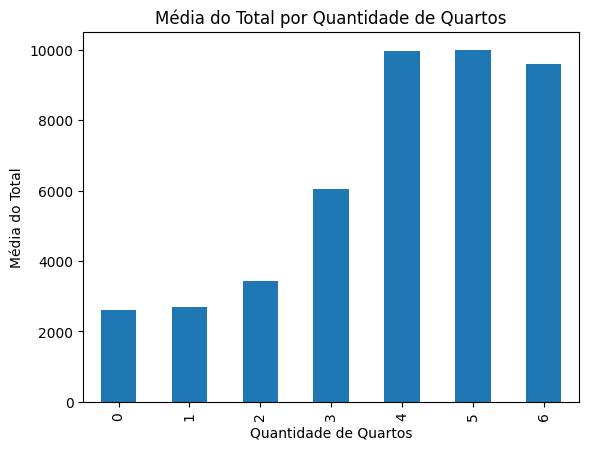

In [42]:
# Agrupar os dados pela quantidade de quartos e calcular a média do total em cada grupo
media_total_por_quartos = dados.groupby('bedrooms')['total'].mean()

# Exibir os resultados
print(media_total_por_quartos)
media_total_por_quartos.plot(kind='bar', xlabel='Quantidade de Quartos', ylabel='Média do Total', title='Média do Total por Quantidade de Quartos')
plt.show()

Com isso agora conseguimos ver uma relação da quantidade de quartos pelo Custo total de aluguel

In [43]:
regiao = regiao.sort_values(by='total', ascending=False)
regiao.head(10)

,area,bedrooms,garage,rent,total,custo m²
district,,,,,,
Cidade Jardim,420.0,4.0,2.0,13000.0,20380.0,49.0
Alphaville Residencial Plus,420.0,4.0,4.0,15000.0,20270.0,48.0
Alphaville Residencial Dois,540.0,6.0,6.0,15000.0,17410.0,32.0
Jardim Cordeiro,400.0,3.0,4.0,11250.0,16670.0,42.0
Jardim Tango,15.0,1.0,1.0,15000.0,15640.0,1043.0
Residencial Cinco,385.0,4.0,6.0,13600.0,15380.0,40.0
Alphaville Residencial Um,445.0,3.0,4.0,13500.0,15030.0,36.0
Centro Empresarial Tambore,179.0,3.0,3.0,11833.0,14430.0,84.0
Jardim Dos Estados,244.0,4.0,4.0,11583.0,13893.0,3834.0


Agora consigo demonstrar o top 10 das regiões mais caras e as regiões mais baratas

                               total
district                            
Cidade Jardim                20380.0
Alphaville Residencial Plus  20270.0
Alphaville Residencial Dois  17410.0
Jardim Cordeiro              16670.0
Jardim Tango                 15640.0
Residencial Cinco            15380.0
Alphaville Residencial Um    15030.0
Centro Empresarial Tambore   14430.0
Jardim Dos Estados           13893.0
Chacara Meyer                13550.0


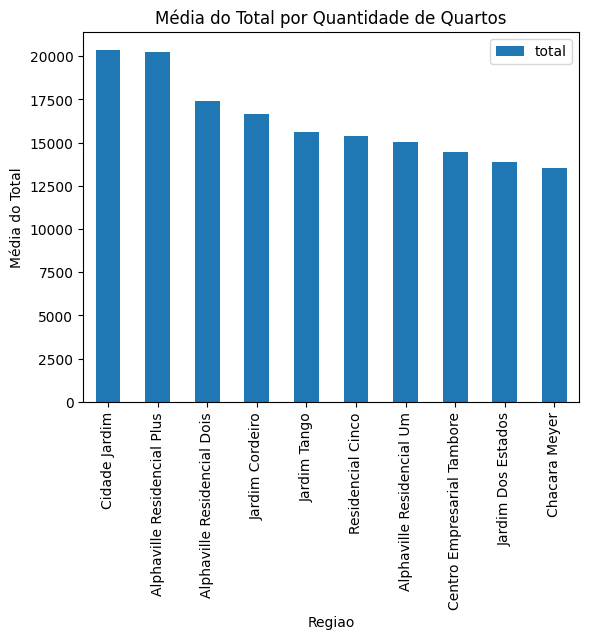

                       total
district                    
Jardim Ataliba Leonel  868.0
Jardim Lucia           864.0
Jardim Tiete           831.0
Vila Serralheiro       803.0
Sitio Do Piqueri       782.0
Jardim Frei Galvao     740.0
Vila Ramos             740.0
Jardim Inga            671.0
Jardim Maraba          654.0
Jardim Jacana          509.0


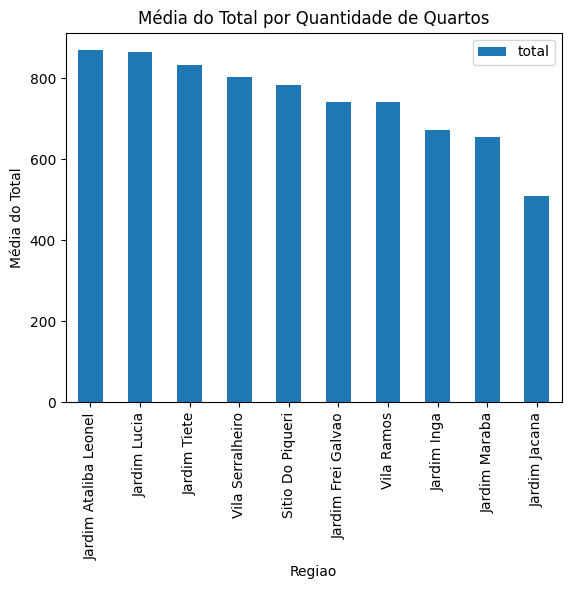

In [44]:
# Agrupar os dados pela quantidade de quartos e calcular a média do total em cada grupo
top_10_mais_caros_district = regiao.head(10)[['total']]
top_10_mais_baratos_district = regiao.tail(10)[['total']]

# Exibir os resultados
print(top_10_mais_caros_district)
top_10_mais_caros_district.plot(kind='bar', xlabel='Regiao', ylabel='Média do Total', title='Média do Total por Quantidade de Quartos')
plt.show()

print(top_10_mais_baratos_district)
top_10_mais_baratos_district.plot(kind='bar', xlabel='Regiao', ylabel='Média do Total', title='Média do Total por Quantidade de Quartos')
plt.show()

Demonstrar agora por tipo de locao qual a area e tambem o custo

In [45]:
locacao = dados.groupby('type')[['area','bedrooms','garage','rent','total']].mean()
locacao.round()

,area,bedrooms,garage,rent,total
type,,,,,
Apartamento,73.0,2.0,1.0,3357.0,4435.0
Casa,136.0,2.0,2.0,3472.0,3824.0
Casa em condomínio,119.0,2.0,1.0,3913.0,4576.0
Studio e kitnet,32.0,1.0,0.0,2128.0,2668.0


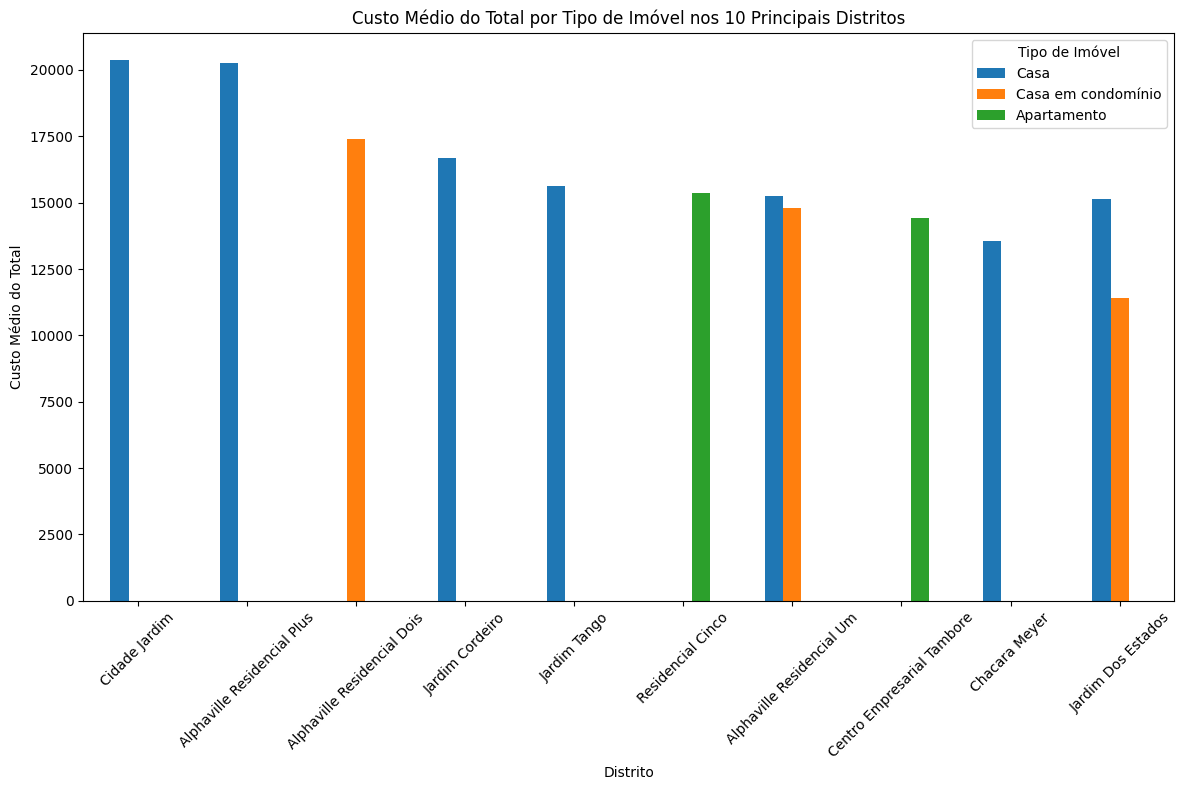

In [46]:
# Agrupar os dados por 'district' e 'type' e calcular a média do 'total'
custo_medio_por_tipo_e_distrito = dados.groupby(['district', 'type'])['total'].mean()

# Selecionar os 10 principais distritos com base no custo médio total
top_10_distritos = custo_medio_por_tipo_e_distrito.groupby(level=0).mean().nlargest(10).index

# Filtrar os dados apenas para os 10 principais distritos
custo_medio_top_10_distritos = custo_medio_por_tipo_e_distrito.loc[top_10_distritos]

# Plotar um gráfico de barras
custo_medio_top_10_distritos.unstack().plot(kind='bar', figsize=(12, 8))
plt.title('Custo Médio do Total por Tipo de Imóvel nos 10 Principais Distritos')
plt.xlabel('Distrito')
plt.ylabel('Custo Médio do Total')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Imóvel')
plt.tight_layout()
plt.show()

Com isso podemos ver que os top 10 bairros mais caros tem casas e casas em condominios como soberanas e apartamentos aparece em apenas 2 das 10 regiões mais caras

Abaixo utilizei um for para fazer a comparação bairro por bairro mas seprando apenas por tipo de locação

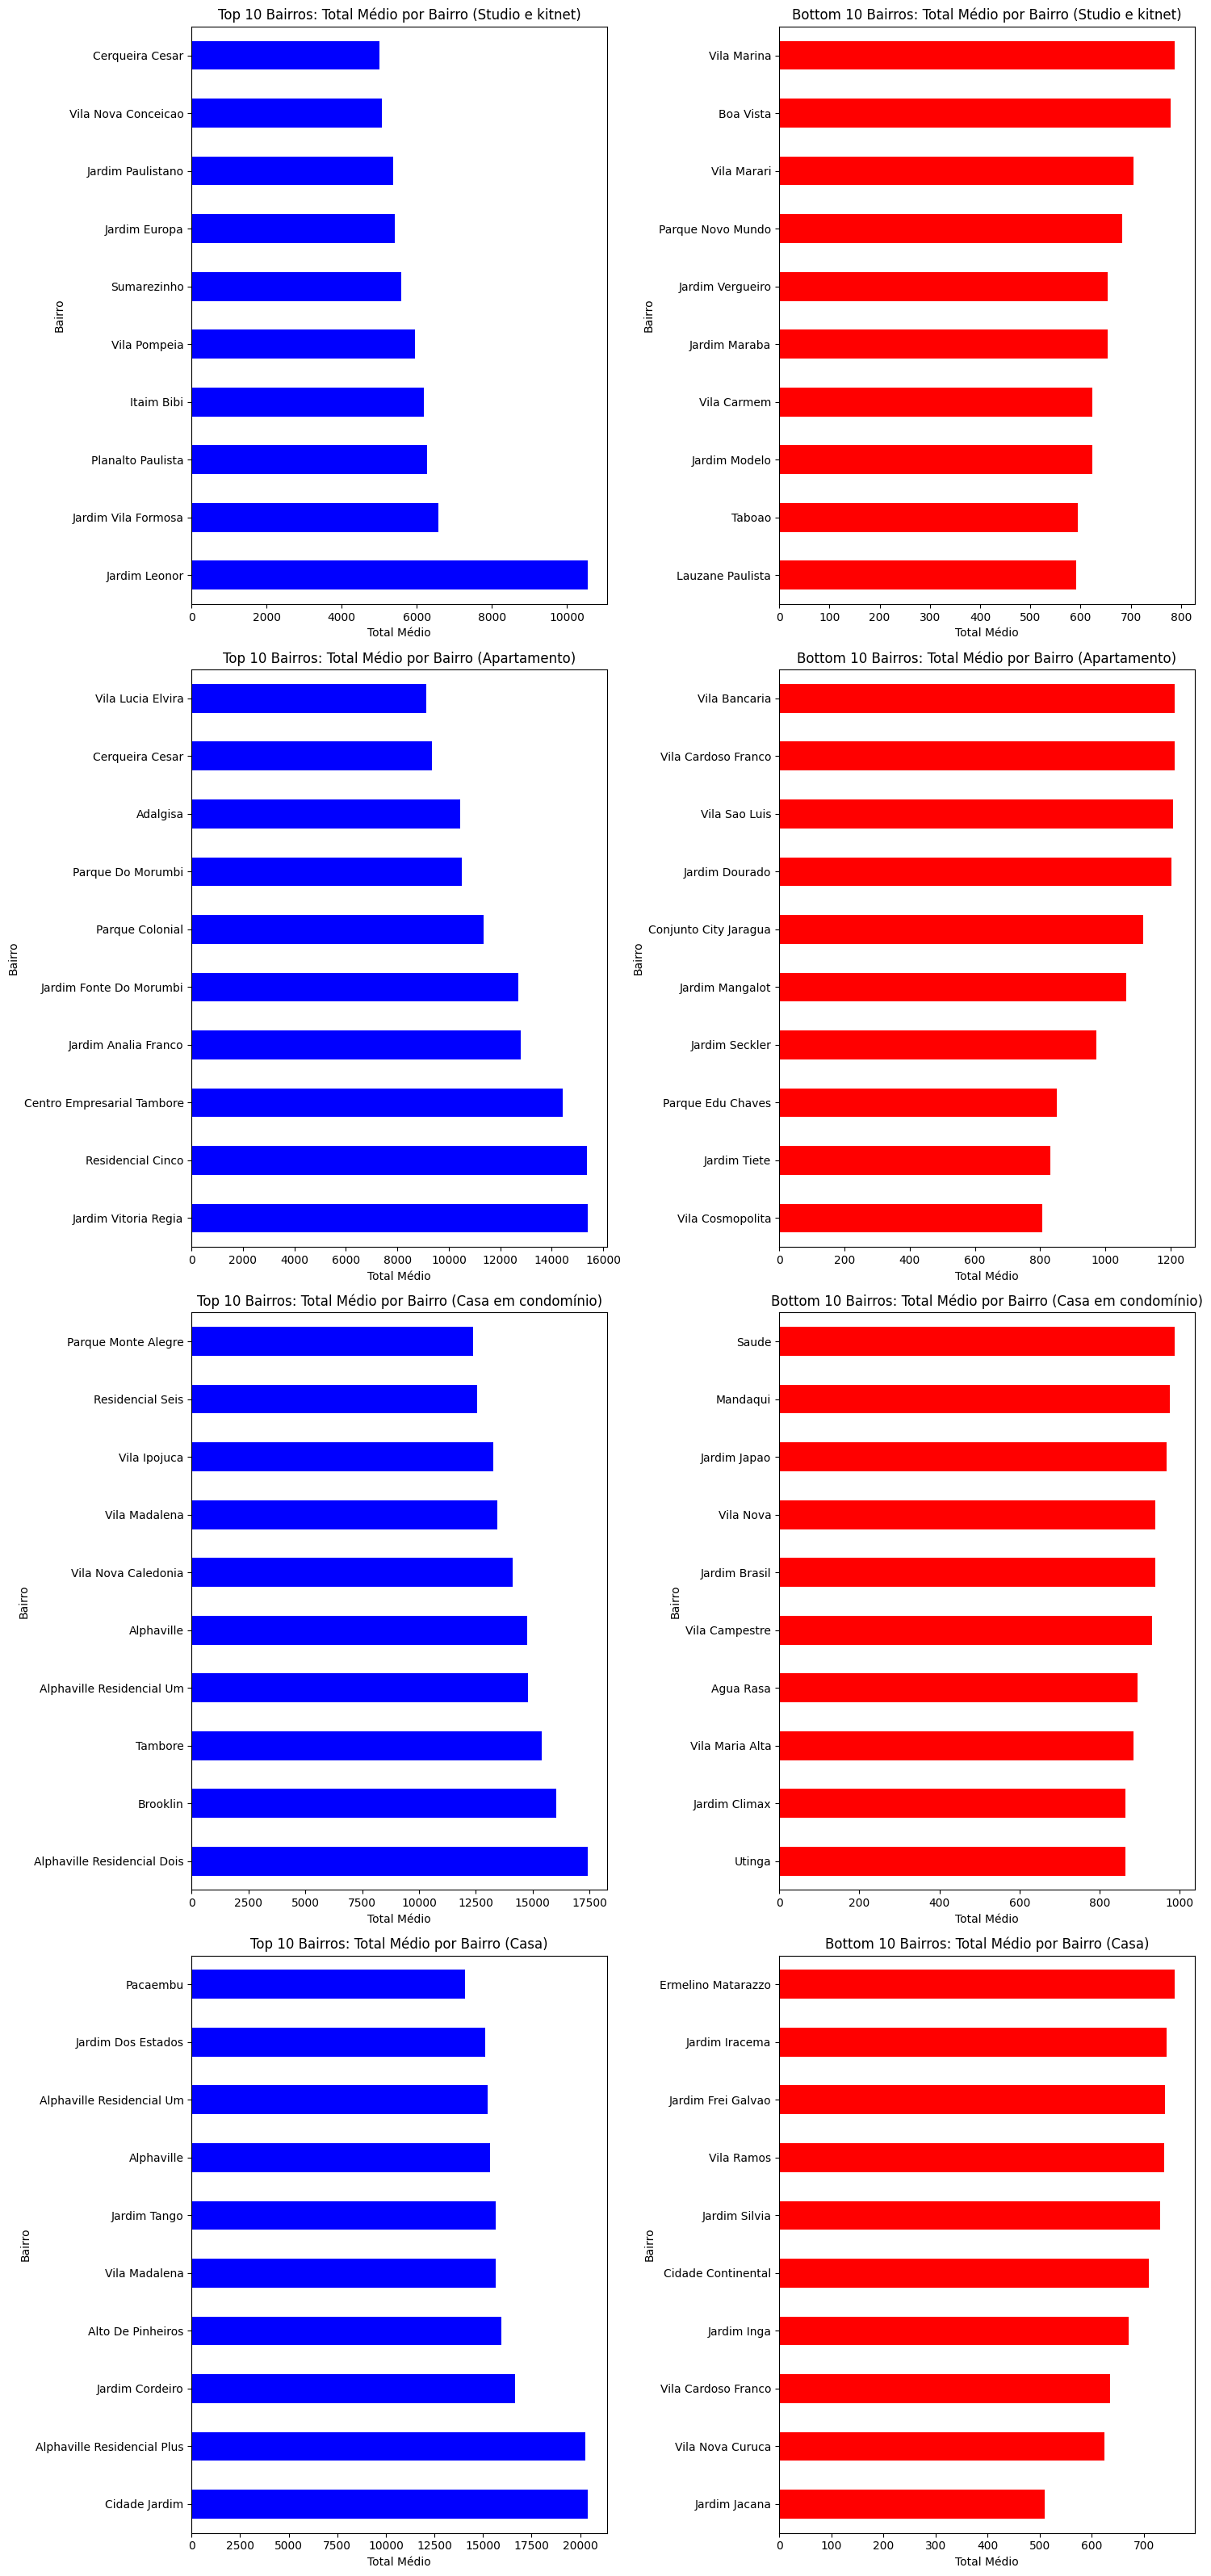

In [47]:
#Variavel para armazenar os dados por tipo de locacao e bairro e tambem a media total de custo
media_total_por_tipo_e_bairro = dados.groupby(['type', 'district'])['total'].mean()

#separar a variavel anterior em 2 uma para o top 10 e outra para o bottom 10
top_10_bairros_por_tipo = media_total_por_tipo_e_bairro.groupby(level=0).nlargest(10).index.get_level_values(1)
bottom_10_bairros_por_tipo = media_total_por_tipo_e_bairro.groupby(level=0).nsmallest(10).index.get_level_values(1)

#Criando o tipo de grafico de barras que sera usado
fig, axes = plt.subplots(nrows=len(dados['type'].unique()), ncols=2, figsize=(15, 8*len(dados['type'].unique())))

#Utilizando o for para conseguir plotar o grafico para cada tipo de locacao e um do top 10 e outro do bottom 10
for i, tipo in enumerate(dados['type'].unique()):
    top_10_bairros = media_total_por_tipo_e_bairro.loc[tipo].nlargest(10)
    bottom_10_bairros = media_total_por_tipo_e_bairro.loc[tipo].nsmallest(10)
    
    top_10_bairros.plot(kind='barh', ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f'Top 10 Bairros: Total Médio por Bairro ({tipo})')
    axes[i, 0].set_xlabel('Total Médio')
    axes[i, 0].set_ylabel('Bairro')

    bottom_10_bairros.plot(kind='barh', ax=axes[i, 1], color='red')
    axes[i, 1].set_title(f'Bottom 10 Bairros: Total Médio por Bairro ({tipo})')
    axes[i, 1].set_xlabel('Total Médio')
    axes[i, 1].set_ylabel('Bairro')

plt.tight_layout()
plt.show()

## Modelagem de Regressão Linear:

In [48]:
dados.describe().round(2)

,area,bedrooms,garage,rent,total,custo m²
count,11657.00,11657.00,11657.00,11657.00,11657.00,11657.00
mean,84.66,1.97,1.06,3250.81,4080.03,inf
std,74.02,0.93,1.13,2650.71,3352.48,NaN
min,0.00,0.00,0.00,500.00,509.00,4.52
25%,40.00,1.00,0.00,1590.00,1996.00,33.23
50%,60.00,2.00,1.00,2415.00,3057.00,48.11
75%,96.00,3.00,2.00,3800.00,4774.00,70.00
max,580.00,6.00,6.00,25000.00,28700.00,inf


Criando o boxplot pra identificar os Q1, Q2 e Q3 e a mediana

<Axes: title={'center': 'Custo de M²'}, ylabel='area'>

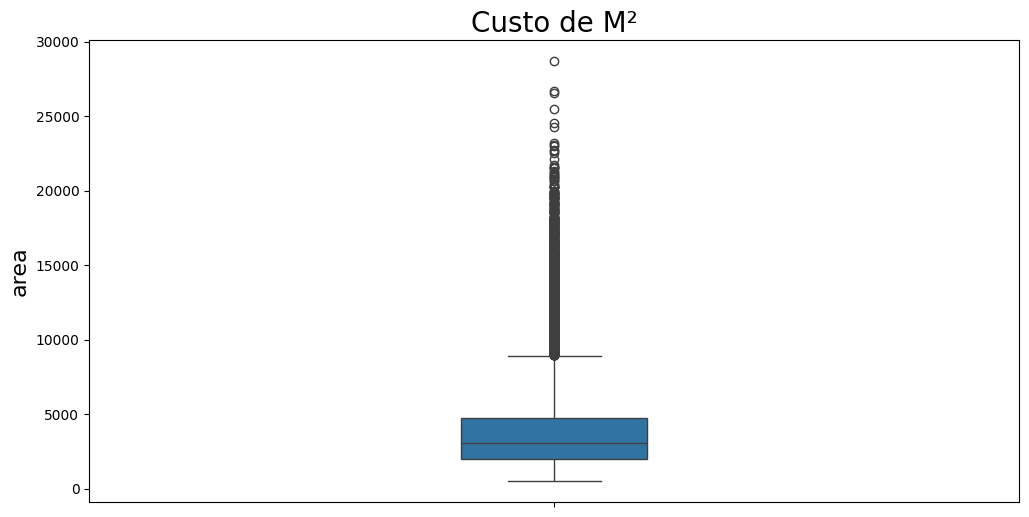

In [49]:
ax = sb.boxplot(data=dados['total'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Custo de M²', fontsize=20)
ax.set_ylabel('area', fontsize=16)
ax

É possivel verificar que existem muitos dados fora do boxplot então usar o showfliers para remover os outliers

<Axes: title={'center': 'Custo de M² por Locação'}, xlabel='locação', ylabel='custo m²'>

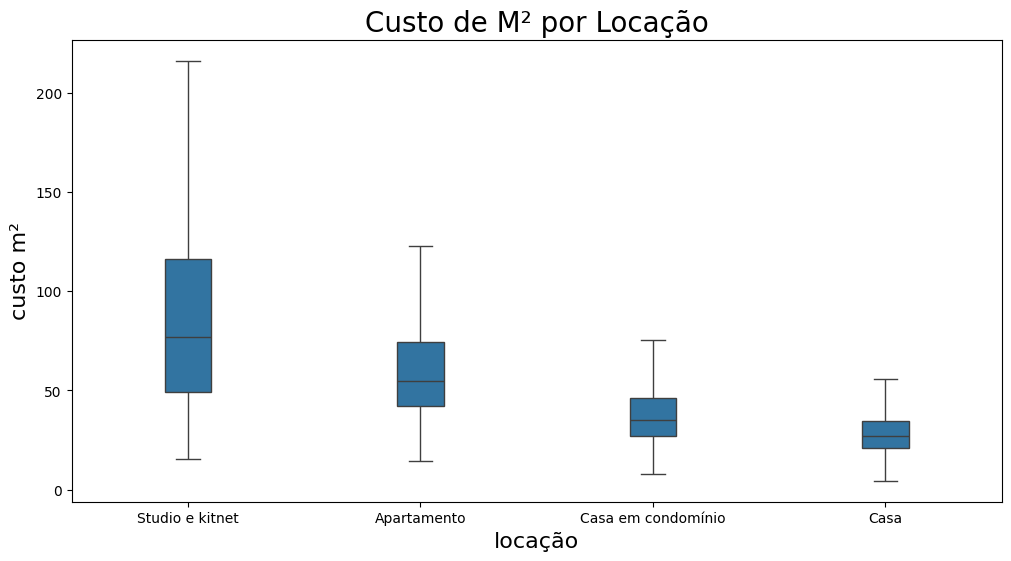

In [50]:
ax = sb.boxplot(y='custo m²',x='type' ,data=dados, orient='v', width=0.2, showfliers= False)
ax.figure.set_size_inches(12, 6)
ax.set_title('Custo de M² por Locação', fontsize=20)
ax.set_ylabel('custo m²', fontsize=16)
ax.set_xlabel('locação', fontsize=16)
ax

Com esse boxplot é possivel ver que o custo do m² do kitnet e studio é muito maior que de outros investimentos para locação apesar dele ser mais barato no geral o fato do seu valor total ser menor que de apartamentos casas e casas de condominios ainda é um valor de custo beneficio muito menor.

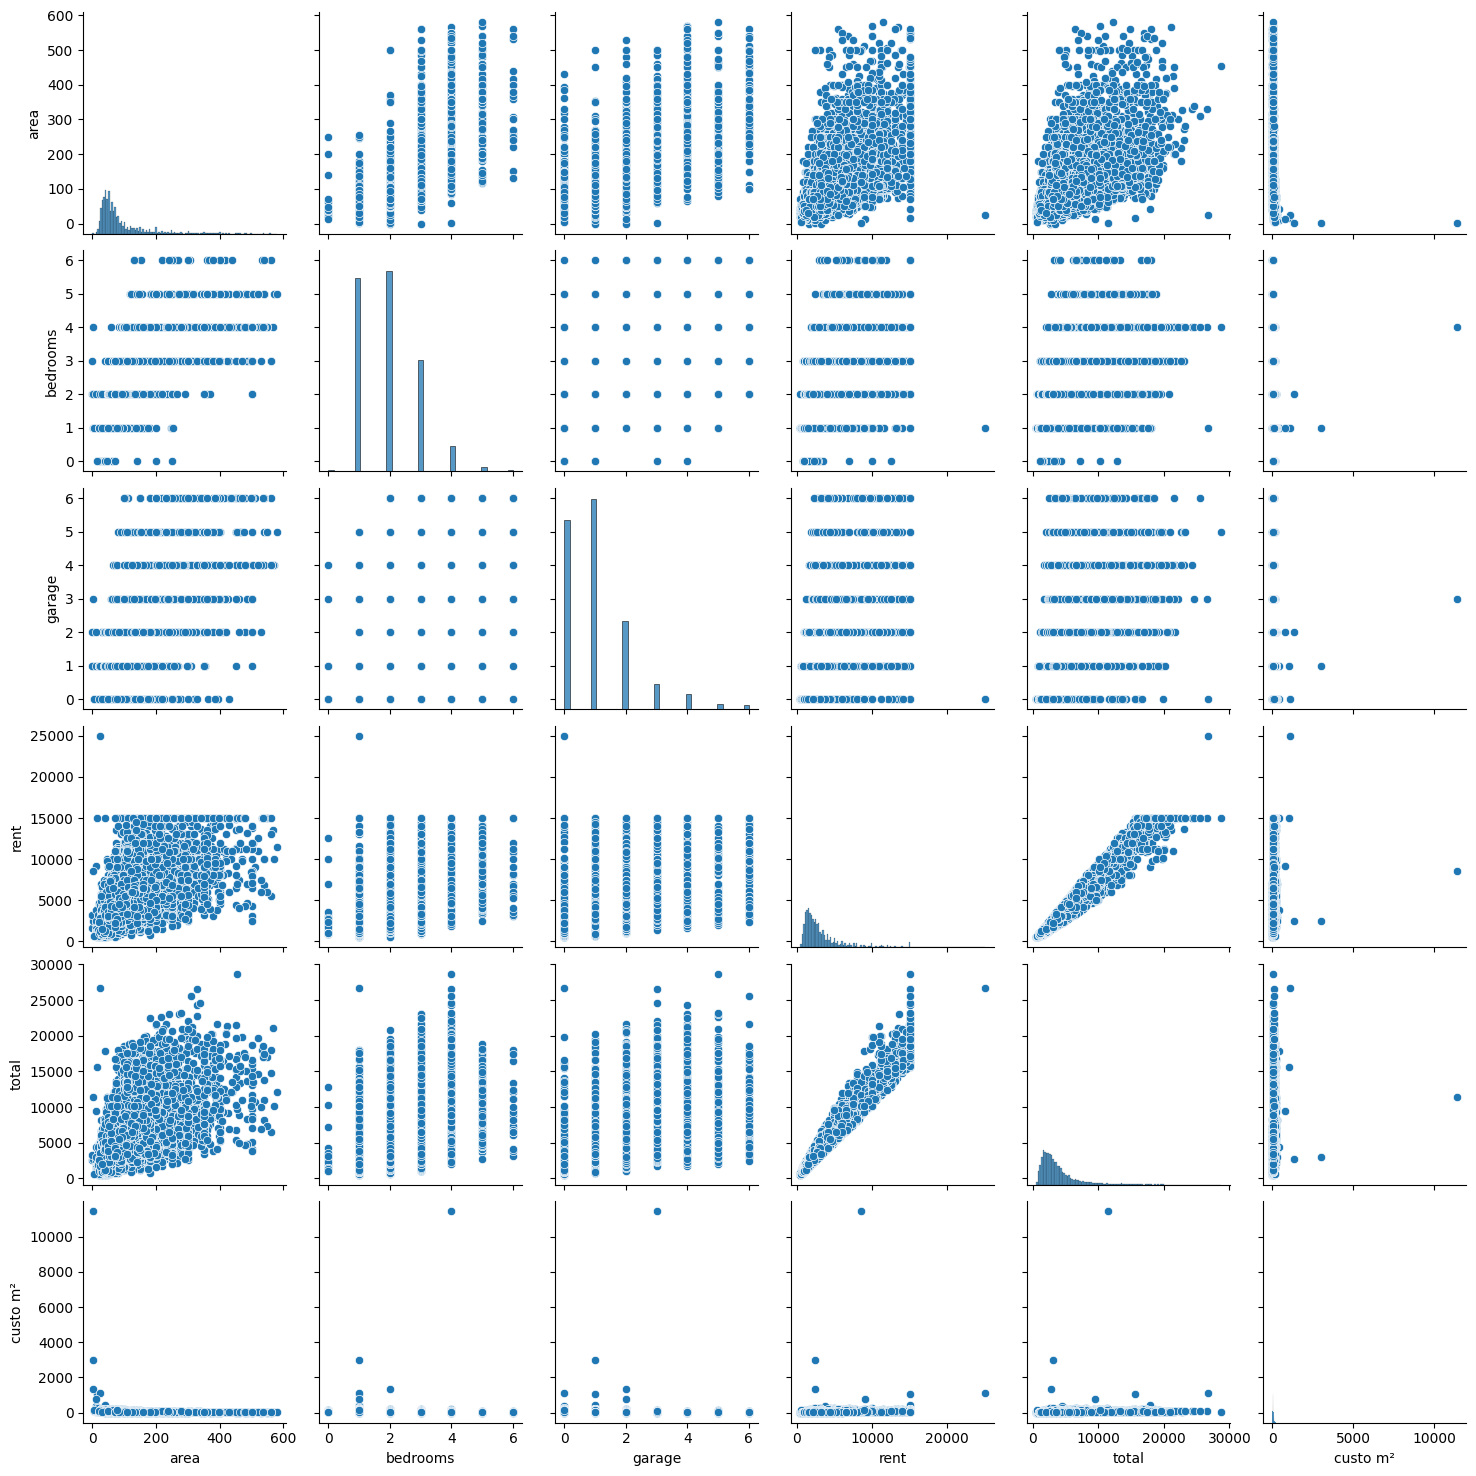

In [51]:
ax = sb.pairplot(dados)

Utilizando o pairplot podemos ver toda a relação de todos os pontos do dataframe

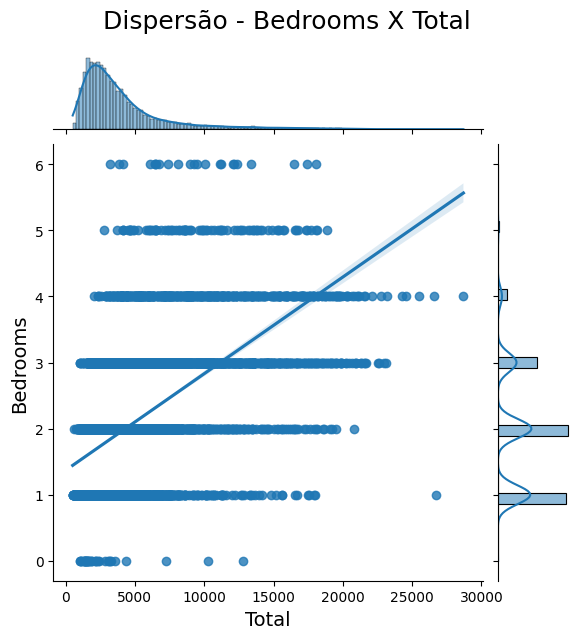

In [52]:
ax = sb.jointplot(y="bedrooms", x="total", data=dados, kind='reg')
ax.fig.suptitle('Dispersão - Bedrooms X Total', fontsize=18, y=1.05)
ax.set_axis_labels("Total","Bedrooms", fontsize=14)
ax

Um ponto curioso existem apartamentos com 3 quartos e 2 quartos muito mais caros que apartamentos com 6 quartos uma relação diferente

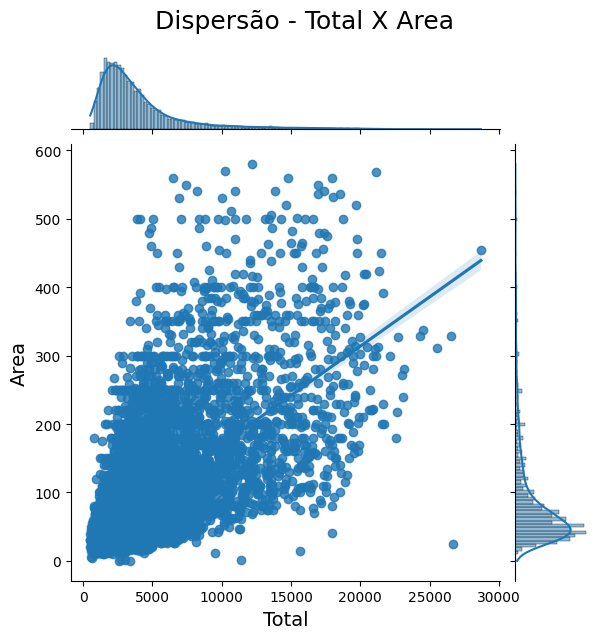

In [53]:
ax = sb.jointplot(y="area", x="total", data=dados, kind='reg')
ax.fig.suptitle('Dispersão - Total X Area', fontsize=18, y=1.05)
ax.set_axis_labels("Total","Area", fontsize=14)
ax

Em geral o aluguel total de uma residencia de 400 metros quadrados custa 30mil ao mês.

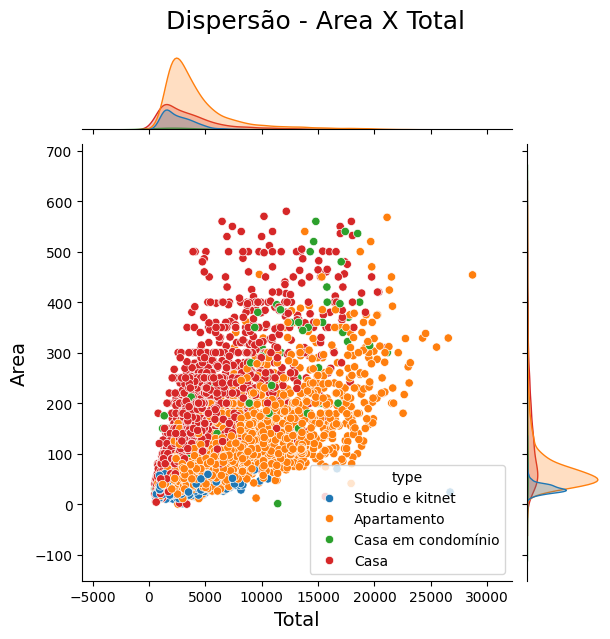

In [54]:
ax = sb.jointplot(y="area", x="total", data=dados,hue='type' ,markers=['o', '*'], legend='auto')
ax.fig.suptitle('Dispersão - Area X Total', fontsize=18, y=1.05)
ax.set_axis_labels("Total","Area", fontsize=14)
ax


Podemos identificar que um apartamento de 550 metros  quadrados vai custar mais de 20000 ao mês.

## Bom minha analise ao realizar tudo isso é:
1. O kitnet apesar de ser mais barato no bruto quando colocado na questão do custo por metro quadrado acaba saindo mais caro
2. Não existe uma relação total pela quantidade de quartos pelo custo do local pois temos bastante locações 6 quartos no geral estão mais baratas que locações com 3 quartos se levarmos em conta todos os valores
3. Quando essa comparação é feita pelo valor medio obviamente moveis com 6 quartos acabam saindo mais caro
4. Por custo de metro quadrado temos o Jardim Dos Estados como mais caro e Jardim Los Angeles o Mais barato em relação ao metro quadrado
5. Podemos ver como casas no geral são dominantes em móveis de alto padrão.
6. E por ultimo podemos ver que em geral que se tiver uma casa e apartamento com a mesma area o preço do apartamento seria maior